**Importing data**

In [6]:
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import StandardScaler

**Description of the data**

1. **ph: pH of 1. water (0 to 14).**
2. **Hardness: Capacity of water to precipitate soap in mg/L.**
3. **Solids: Total dissolved solids in ppm.**
4. **Chloramines: Amount of Chloramines in ppm.**
5. **Sulfate: Amount of Sulfates dissolved in mg/L.**
6. **Conductivity: Electrical conductivity of water in μS/cm.**
7. **Organic_carbon: Amount of organic carbon in ppm.**
8. **Trihalomethanes: Amount of Trihalomethanes in μg/L.**
9. **Turbidity: Measure of light emiting property of water in NTU.**
10. **Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0**

1. **pH value:**

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2.**Hardness:**

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS):**

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines:**

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate:**

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity:**

Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:**

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes:**

THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:**

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability:**

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

expand_less


**Reading the data** ,

**checking the shape of the data**

In [7]:
df = pd.read_csv('water_potability.csv')
df.shape

(3276, 10)

##3276 rows,10 columns.

In [8]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Extracting the unique values of each column**


In [ ]:
print(f'Unique values of ph: {sorted(df["ph"].unique())}')

Unique values of ph: [nan, 0.0, 0.2274990502021987, 0.975577989772022, 0.9899122128791388, 1.4317815547427415, 1.757037115490783, 1.844538366498842, 1.985383359263048, 2.1285314339651724, 2.376768075959951, 2.538115773481364, 2.5581027992200664, 2.5692435620279186, 2.612035914817261, 2.690831240408815, 2.798549098862777, 2.803563057437167, 2.9251743203391, 2.9454690611226875, 2.974429410478532, 3.1020755653395566, 3.14871228517616, 3.2309731059187423, 3.2616697873910208, 3.2728200975185464, 3.3376289979634506, 3.3445885334830234, 3.388090610523891, 3.41035967073924, 3.4223941642163864, 3.4264503676355647, 3.433874059145088, 3.434855759978651, 3.4450618643852127, 3.514545528745279, 3.551579176967154, 3.5908223640059966, 3.623165848258656, 3.629922064880713, 3.633162828862528, 3.637170625355805, 3.641629777473381, 3.657123132566738, 3.664710561719395, 3.6768449933847727, 3.678431807207628, 3.681076270548827, 3.6919326929347136, 3.715171359884693, 3.71608007538699, 3.717703934990307, 3.71

In [11]:
print(f'Unique values of Hardness: {sorted(df["Hardness"].unique())}')

Unique values of Hardness: [47.432, 73.4922336890611, 77.45958610044372, 81.7108952702466, 94.0913074831264, 94.81254521783356, 94.90897712808312, 97.28090859780744, 98.3679148956603, 98.45293050958628, 98.7716435320576, 100.4576150915831, 100.80651972166484, 103.17358697810718, 103.46475866009456, 104.75242498882724, 105.85926357195498, 106.3801125414636, 107.34198187869087, 107.3833271231581, 108.69907681469638, 108.91662923953172, 110.86578832349096, 110.9035977471642, 111.2464115966342, 111.47858175418116, 111.9940275170517, 112.29948548284678, 112.82025397576253, 113.02447173130597, 113.17596460727071, 113.5046982156932, 113.8311121743512, 114.37145034033318, 114.46389984219503, 114.7335449715346, 114.8075783848566, 115.39297941167531, 116.06195043863976, 116.29932988379586, 116.33827811922914, 116.72512210866824, 116.90547929864172, 117.05731445445494, 117.79122955039698, 118.98857909025187, 119.02821548640011, 119.09383996546896, 119.16401026970028, 119.33403564526418, 119.84190

In [12]:
print(f'Unique values of Solids: {sorted(df["Solids"].unique())}')

Unique values of Solids: [320.942611274359, 728.7508295768456, 1198.9436990081783, 1351.9069790965912, 1372.0910434922284, 2552.962803650125, 2808.025755679448, 2835.3031650451026, 2912.2112468274267, 3413.08163340648, 3640.73431981458, 3773.2811465808113, 3802.4116810167206, 3900.913891731133, 4111.7854317957845, 4142.4990006204325, 4168.196993742783, 4304.492483085919, 4343.356611002731, 4425.426440298955, 4440.277357352502, 4466.257487680507, 4544.841717583644, 4728.650671023337, 4784.967879427389, 4857.253806702753, 5075.269201855393, 5097.825849772476, 5100.094172699328, 5128.457645769734, 5157.053599876038, 5230.630429801216, 5232.913253564904, 5477.347214769689, 5516.874952577377, 5576.628297064725, 5619.135557865849, 5689.804404872833, 5699.504942202689, 6040.369868025334, 6068.454884948079, 6108.795734261221, 6193.330562324434, 6342.502842776547, 6493.547256349771, 6552.626314154267, 6626.376425713154, 6670.659353530027, 6675.682244593603, 6698.239095162861, 6700.775053800422,

In [13]:
print(f'Unique values of Chloramines: {sorted(df["Chloramines"].unique())}')

Unique values of Chloramines: [0.3520000000000003, 0.5303512946996154, 1.3908709048851806, 1.6839925807280034, 1.92027144925428, 2.1026909914982523, 2.3866534943935944, 2.39798498956576, 2.4560135962074776, 2.458609195210029, 2.4843799772443687, 2.4985967213169733, 2.562255458189081, 2.577555273054553, 2.62126755562118, 2.648389906859159, 2.654490953924924, 2.7267656255779578, 2.7417121173046723, 2.7508373088106506, 2.7857184262233883, 2.855789795310306, 2.862535374452988, 2.8660730298495407, 2.9813789663386965, 2.9937440607391426, 3.016032602671193, 3.074316126651996, 3.117440980065026, 3.124832555432105, 3.139552657761377, 3.18118329063755, 3.1949687604769608, 3.2057862828959096, 3.2314384013788304, 3.239580330769817, 3.2679840915011398, 3.2711440240210687, 3.2961573212193027, 3.308977338758735, 3.3116072571688484, 3.31804504559376, 3.3312659575740278, 3.351597819645086, 3.372369253748352, 3.4026815899619844, 3.4095758357574946, 3.440880123602577, 3.445514571005745, 3.458191681970314

In [14]:
print(f'Unique values of Sulfate: {sorted(df["Sulfate"].unique())}')

Unique values of Sulfate: [129.00000000000003, 180.20674636482343, 205.93509063777853, 207.89048227407596, 211.85159230220145, 214.4608337745459, 223.23581613133052, 224.21250304477925, 225.5166278231677, 227.66563528463143, 229.57556091890592, 230.55585580745375, 231.0536871188208, 231.72422478606265, 232.54881350488503, 233.87032745359195, 234.6098078374307, 235.7709818536182, 235.9954609732577, 237.51745555960457, 238.4465643028421, 238.8440036875379, 240.89762892316972, 240.93672213751188, 241.12629768934127, 244.0862569192538, 245.95425295135877, 246.94261132183635, 247.6457432305505, 248.71196339107, 251.3839436816425, 251.44349970246384, 252.06726719561703, 252.10892512246252, 252.23132963398223, 253.4335055124074, 253.48122792295464, 253.5802344856185, 254.04097685166928, 254.35880116793825, 255.5446783507184, 256.08951680458495, 257.1486503886936, 257.4594811240221, 258.4442941492116, 258.930600411521, 259.1221313561398, 261.3570408464161, 262.57204204579494, 262.9957563531879

In [15]:
print(f'Unique values of Conductivity: {sorted(df["Conductivity"].unique())}')

Unique values of Conductivity: [181.483753985146, 201.6197367551575, 210.31918197203672, 217.35832957837812, 232.61362402653705, 233.90796511138964, 235.0422834749786, 245.85963197125264, 247.91803052825009, 251.02089870586465, 252.96832778421404, 254.3923057502336, 254.39327560480757, 256.3025585111134, 257.0077176932619, 257.7041794322704, 257.96315421657613, 258.88020903971534, 259.63680306558183, 259.96376259206005, 260.53175818559777, 260.56616359428097, 261.4352151594753, 263.7719135045372, 264.2839333983375, 264.5080825120705, 264.6994734696039, 265.2511986375809, 266.3577439142132, 267.8017106702044, 268.4408502490151, 269.0136348220542, 269.3446352437425, 269.4490512269393, 269.8175391182222, 270.055393805813, 270.794058781986, 271.3684374970511, 271.63073825352404, 272.440558304258, 273.44683817182425, 273.69713915492014, 274.66059655361465, 274.696540079706, 274.7647028108312, 275.071712253359, 275.31714604250067, 275.9865952550496, 276.58861018264633, 277.05080172633507, 27

In [16]:
print(f'Unique values of Organic_carbon: {sorted(df["Organic_carbon"].unique())}')
print(f'Unique values of Trihalomethanes: {sorted(df["Trihalomethanes"].unique())}')

Unique values of Organic_carbon: [2.1999999999999886, 4.371898608441143, 4.466771969153569, 4.473092263860565, 4.861631498475731, 4.902888068022662, 4.966861618807002, 5.051694615257361, 5.159380307579738, 5.1884664553876405, 5.196716755320665, 5.218232927132192, 5.315286537158272, 5.3623709055002, 5.426649934563386, 5.512039717949506, 5.537059328787905, 5.5676927910151335, 5.871941343599474, 5.9146170684173285, 5.93458832142386, 5.98033920599562, 6.0003909304893455, 6.016336609271207, 6.039669028207072, 6.059608220858536, 6.063461912529135, 6.091226588480367, 6.124625358081971, 6.13421040957104, 6.306055459593097, 6.363174829578838, 6.374070260129599, 6.478625963896491, 6.530428639650097, 6.580401550826252, 6.658138624942751, 6.732793597705609, 6.747761288662503, 6.7480919380226965, 6.776145723392403, 6.874315403971821, 7.024747096163139, 7.02553623282671, 7.070771158478237, 7.090387208534082, 7.0912289574613965, 7.091298157253846, 7.122391112549337, 7.151750616262859, 7.1686071768436

In [17]:
print(f'Unique values of Turbidity: {sorted(df["Turbidity"].unique())}')

Unique values of Turbidity: [1.45, 1.4922066153042484, 1.4961009425719864, 1.6415150097935705, 1.6597993845044374, 1.6805540245774622, 1.6876245048272964, 1.8013269989752103, 1.81252893956422, 1.8443716036962137, 1.872572600841316, 1.8996830017290975, 1.9101166454023035, 1.9177543925715308, 1.922376882636882, 1.94331877663582, 1.9614754295823136, 1.9648630966312208, 1.984614866576952, 1.986191593058412, 2.0007570315103718, 2.0041425861250266, 2.010537157431691, 2.0107286862843203, 2.0190420182011657, 2.0288751732864254, 2.081425020190486, 2.081845656839957, 2.0870802171798366, 2.091786839914147, 2.0959140868029458, 2.124759352216301, 2.1486115361452747, 2.165681681201685, 2.174898198676531, 2.1817141666785806, 2.1887018433563847, 2.191138421703526, 2.2006782017544677, 2.203840523502365, 2.2090917998705097, 2.216729691055614, 2.2206399231442355, 2.227370875365405, 2.227727884059556, 2.233894046042616, 2.2595502886491894, 2.275903461382081, 2.27639196018481, 2.2773586319376298, 2.2834751

In [18]:
print(f'Unique values of Potability: {sorted(df["Potability"].unique())}')

Unique values of Potability: [0, 1]


**Checking any duplicates in data**

In [ ]:
df.duplicated().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


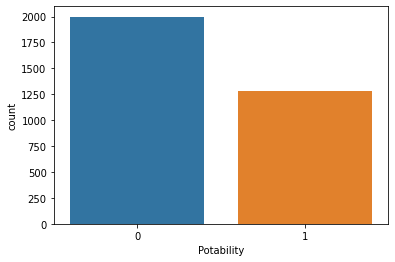

In [ ]:
sns.countplot(df['Potability'])
plt.show()
#as shown most of the water bodies aren't potable

In [ ]:
#correlation
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


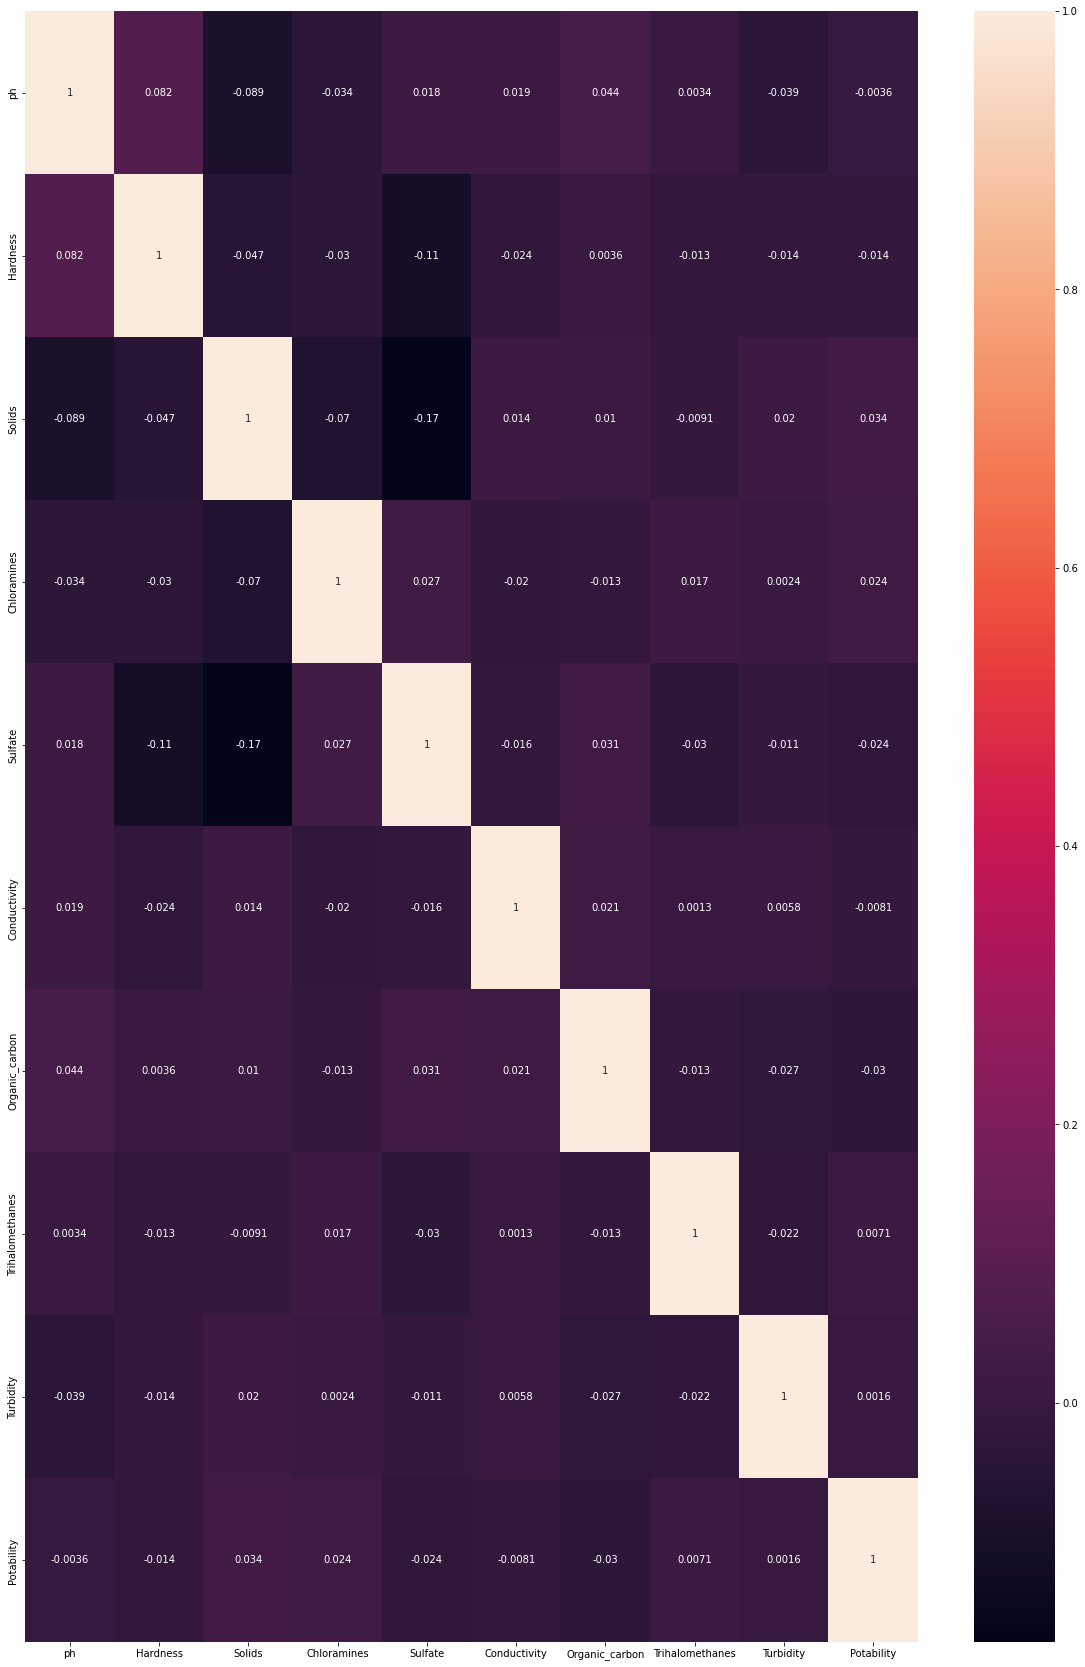

In [ ]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

unique values in columns


In [19]:
df.Potability.value_counts()


0    1998
1    1278
Name: Potability, dtype: int64

**Let's check the distribution of the data**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


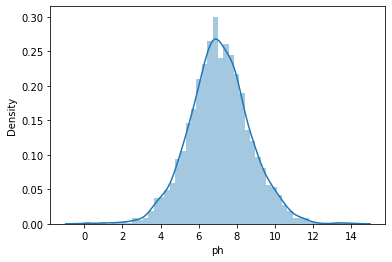

In [ ]:
sns.distplot(df['ph'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


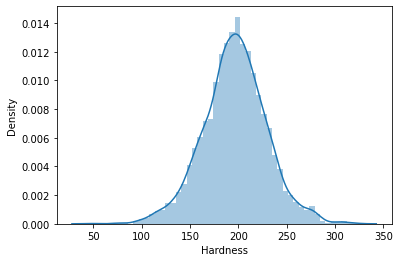

In [ ]:
sns.distplot(df['Hardness'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


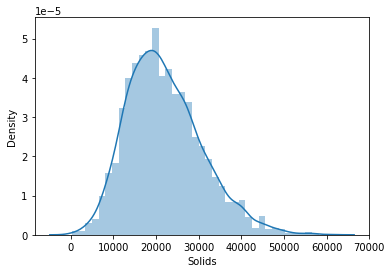

In [ ]:
sns.distplot(df['Solids'])
plt.show()

**As seen solids column is slightly right skwewed,lets try to handle this skewness by sqrt  transform method**

In [ ]:
df['Solids']=np.sqrt(df['Solids'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


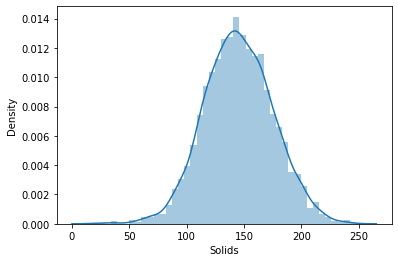

In [ ]:
sns.distplot(df['Solids'])
plt.show()

 the Seaborn library and Matplotlib.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


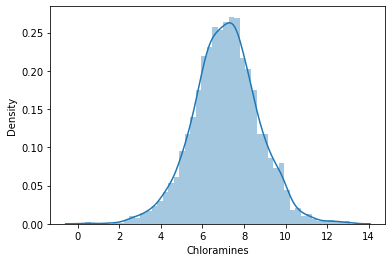

In [ ]:
sns.distplot(df['Chloramines'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


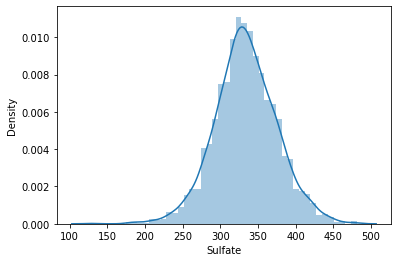

In [ ]:
sns.distplot(df['Sulfate'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


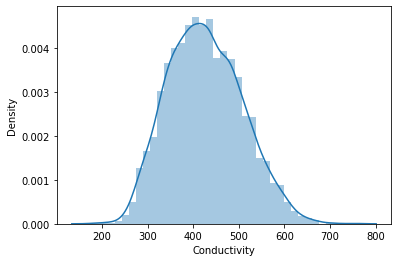

In [ ]:
sns.distplot(df['Conductivity'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


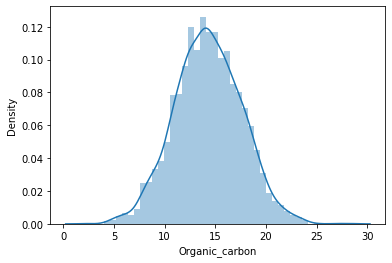

In [ ]:
sns.distplot(df['Organic_carbon'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


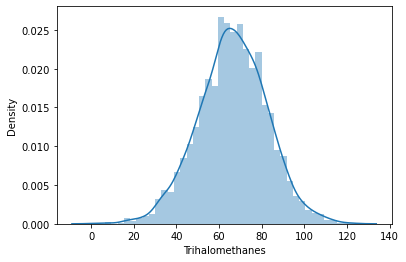

In [ ]:
sns.distplot(df['Trihalomethanes'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


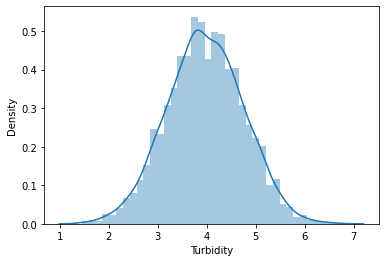

In [ ]:
sns.distplot(df['Turbidity'])
plt.show()

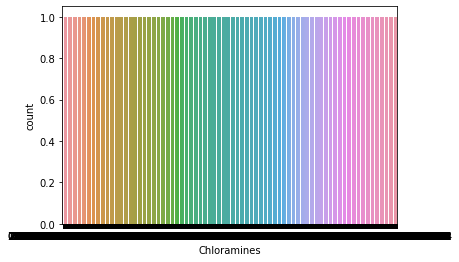

In [ ]:
sns.countplot(x='Chloramines',data=df)

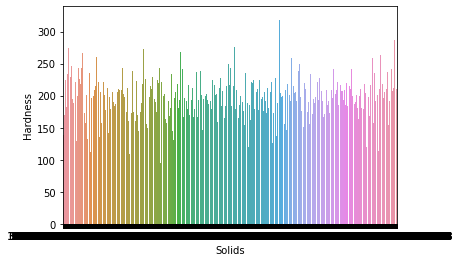

In [ ]:
sns.barplot(x='Solids',y='Hardness',data=df)

**As shwon most of the data is normally distibuted or has a very slight skewness**

**Now we check the nulls of the data**


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#percentage of null values

print(f"ph:{(df.ph.isnull().sum() / df.shape[0]) * 100}")
print(f"Trihalomethanes:{(df.Trihalomethanes.isnull().sum() / df.shape[0]) * 100}")
print(f"Sulfate :{(df.Sulfate .isnull().sum() / df.shape[0]) * 100}")

ph:14.987789987789988
Trihalomethanes:4.945054945054945
Sulfate :23.84004884004884


**Since our data is continous and it is almost normally distributed so we will replace the null values by mean**

In [ ]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Now there is no nulls**

**Now lets check the outliers**

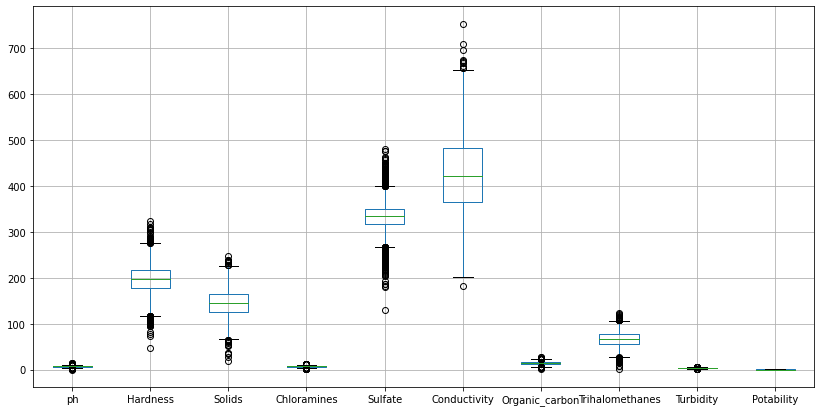

In [ ]:
df.boxplot(figsize=(14,7))

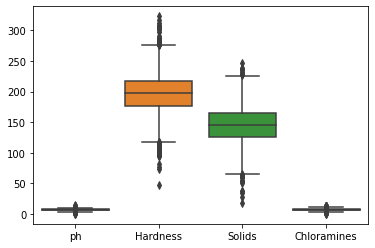

In [ ]:
sns.boxplot(data=df[['ph','Hardness','Solids','Chloramines']])

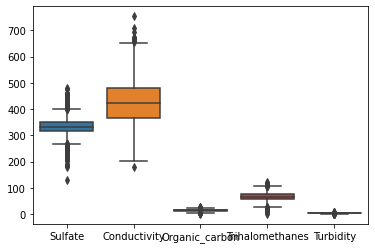

In [ ]:
sns.boxplot(data=df[['Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']])

**Finding the upper and the lower limit of eah column**

In [ ]:
columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for col in columns:
 print("Upper limit of",col,df[col].mean() + 3*df[col].std())
 print("Lower limit of ",col,df[col].mean() - 3*df[col].std())
 print('*********')

Upper limit of ph 11.490662413816526
Lower limit of  ph 2.670926594737147
*********
Upper limit of Hardness 295.008780446184
Lower limit of  Hardness 97.73021158841905
*********
Upper limit of Solids 234.94714573269792
Lower limit of  Solids 55.72169482972603
*********
Upper limit of Chloramines 11.871531460544915
Lower limit of  Chloramines 2.3730221263066573
*********
Upper limit of Sulfate 442.2036131098331
Lower limit of  Sulfate 225.34794011179375
*********
Upper limit of Conductivity 668.6773028358887
Lower limit of  Conductivity 183.73291852921784
*********
Upper limit of Organic_carbon 24.20945624505794
Lower limit of  Organic_carbon 4.360484250296697
*********
Upper limit of Trihalomethanes 113.70593676491393
Lower limit of  Trihalomethanes 19.08664912862212
*********
Upper limit of Turbidity 6.307933395247295
Lower limit of  Turbidity 1.625638944334821
*********


In [ ]:
columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for col in columns:
  print(col + ":\n" + str(df[col].value_counts()))
  print("-------------------")

ph:
7.080795    491
8.554097      1
6.538084      1
5.915807      1
8.136498      1
           ... 
4.187491      1
7.808012      1
5.895949      1
7.269652      1
7.874671      1
Name: ph, Length: 2786, dtype: int64
-------------------
Hardness:
204.890455    1
134.560276    1
170.190912    1
237.461099    1
171.238926    1
             ..
218.237186    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: Hardness, Length: 3276, dtype: int64
-------------------
Solids:
144.191952    1
126.409394    1
192.356325    1
136.880206    1
110.859826    1
             ..
151.078455    1
147.681109    1
212.465729    1
130.528638    1
131.924892    1
Name: Solids, Length: 3276, dtype: int64
-------------------
Chloramines:
7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: Chloramines, Length: 3276, dtype: int64
-------------------
Sulfate:
333.775777    78

**Checking number of outliers in each column using IQR method**

In [ ]:
columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in ph: 142
Number of outliers in Hardness: 74
Number of outliers in Solids: 24
Number of outliers in Chloramines: 53
Number of outliers in Sulfate: 227
Number of outliers in Conductivity: 7
Number of outliers in Organic_carbon: 17
Number of outliers in Trihalomethanes: 42
Number of outliers in Turbidity: 18


**Lets remove the outliers in conducitivity as it is only 7 records**

In [ ]:
#method to remove the outliers
def Remove_Outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return outliers

In [ ]:
#removing the outliers in conductivity
non_Outliers = Remove_Outliers(df['Conductivity'])
df = df[non_Outliers]

In [ ]:
#checking if the outliers aare removed
Q1 = df['Conductivity'].quantile(0.25)
Q3 = df['Conductivity'].quantile(0.75)
IQR = Q3 - Q1
((df['Conductivity'] < (Q1 - 1.5 * IQR)) | (df['Conductivity'] > (Q3 + 1.5 * IQR))).sum()

0

**Now we will replace the outliers in the rest of the columns by the upper and lower limits**

In [ ]:
#method to replace
def replace_outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  cutoff=IQR*1.5
  upperLimit=Q3+cutoff
  lowerLimit=cutoff-Q1
  cutoff=IQR*1.5
  for x in range(len(df)):
   if df[col].iloc[x] > (upperLimit):
    df[col].iloc[x] = upperLimit
   if df[col].iloc[x]< (lowerLimit):
    df[col].iloc[x] = lowerLimit

In [ ]:
#Replacing the outliers in each column by replace outliers method
replace_outliers(df,'ph')
replace_outliers(df,'Hardness')
replace_outliers(df,'Chloramines')
replace_outliers(df,'Solids')
replace_outliers(df,'Sulfate')
replace_outliers(df,'Trihalomethanes')
replace_outliers(df,'Organic_carbon')
replace_outliers(df,'Turbidity')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


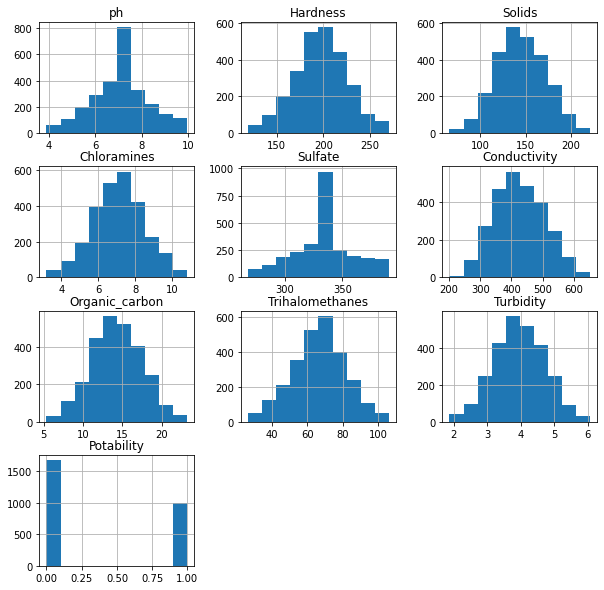

In [ ]:
df.hist(figsize=(10,10))
plt.show()

**Splitting the data**

In [ ]:
X = df.drop('Potability', axis = 1)
Y=df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y ,test_size=0.2 ,random_state=10 ,shuffle=True)

**We need to standardize our data**

**Standardization process converts data to smaller values in the range 0 to 1 so that all of them lie on the same scale and one doesn’t overpower the other.**

**By search used standardScaler from sklearn to do so**

In [ ]:
columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
sc=StandardScaler()
X_train[columns]=sc.fit_transform(X_train[columns])
X_test[columns]=sc.transform(X_test[columns])


**Creating a Logistic regression model and training it**

In [ ]:
classifier =LogisticRegression(random_state=0)

In [ ]:
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[357,   0],
       [178,   0]])

**Confusion Matrix shows:**

**357 True negative predictions**,

**0 false positive**,

**178 false negative** ,

**0 true positive**

In [ ]:
cr=classification_report(Y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       357
           1       0.00      0.00      0.00       178

    accuracy                           0.67       535
   macro avg       0.33      0.50      0.40       535
weighted avg       0.45      0.67      0.53       535



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Testing score = {accuracy_score(Y_test,y_pred)}")

Testing score = 0.6672897196261682


**Creating a KNN model with n_neighbors = 2**

In [ ]:
X = df.drop('Potability', axis = 1)
Y=df['Potability']

In [ ]:
model=KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
from sklearn.metrics import accuracy_score
y_preds=model.predict(X_test)

print(f"Testing score = {accuracy_score(Y_test,y_preds)}")

Testing score = 0.6504672897196262


**Here our accuracy at k =2 is 0.65**


**We need to find the best k at which we have the highest accuracy.**


**By search,Found that we can find the optimal k at the minimum error rate**

In [ ]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,Y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=Y_test))

error_rate

[0.35700934579439253,
 0.34953271028037386,
 0.38691588785046727,
 0.36822429906542054,
 0.3794392523364486,
 0.34953271028037386,
 0.36261682242990656,
 0.36074766355140186,
 0.37383177570093457,
 0.35514018691588783,
 0.3775700934579439,
 0.36074766355140186,
 0.3794392523364486,
 0.3401869158878505,
 0.3663551401869159,
 0.33084112149532713,
 0.3383177570093458,
 0.32897196261682243,
 0.33457943925233646,
 0.32897196261682243,
 0.33271028037383177,
 0.32149532710280376,
 0.3177570093457944,
 0.32710280373831774,
 0.32710280373831774,
 0.33457943925233646,
 0.3401869158878505,
 0.32149532710280376,
 0.3383177570093458,
 0.3252336448598131]

**Here we found that minimum error is at k=23**

**So replacing n_neighbors by 23 to check if the accuracy increased**

In [ ]:
clf=KNeighborsClassifier(n_neighbors=23)
clf.fit(X_train,Y_train)
predicted_value=clf.predict(X_test)


In [ ]:
print(f"Testing score = {accuracy_score(Y_test,predicted_value)} ")

Testing score = 0.6822429906542056 


##save and load LR models

##joblib faster when large nuber of numpy arrays ,implimented by pure python


In [ ]:
import joblib

joblib_file = "water_quality_model"
joblib.dump(model , joblib_file)

loaded_model = joblib.load(open(joblib_file ,'rb'))

pred_Y = loaded_model.predict(X_test)
result =np.round(accuracy_score(Y_test, y_preds),2)
print(result)


0.65


making sure that the accurcy score is right 65%

##pickle faster when large collection of python objects, implemented by steam

In [ ]:
import pickle

file ="water_quality_model_pickle.pkl"
pickle.dump(model , open(file , 'wb'))
loaded_model = pickle.load(open(file ,'rb'))

pred_Y = loaded_model.predict(X_test)
result=np.round(accuracy_score(Y_test,y_preds))
print(result)

1.0


##